In [7]:
import numpy as np
import pandas as pd

df =pd.read_csv("Coronavirus Italia_Main Dashboard_Time series (64).csv", usecols=['Deaths', 'Total Cases'])

In [8]:
df.head(10)

,Total Cases,Deaths
0,0,0
1,0,0
2,0,0
3,1,0
4,3,0
5,3,0
6,3,0
7,4,0
8,6,0
9,9,1


In [9]:
X = df.drop("Deaths", axis=1).values
Y = df["Deaths"].values

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [10]:
from sklearn.linear_model import LinearRegression

ll = LinearRegression()
ll.fit(X_train, Y_train)
Y_pred = ll.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

19373.63862466436

In [12]:
from sklearn.metrics import r2_score

r2_score(Y_test, Y_pred)

0.9696104754018504

Peso dei casi totali: 0.022953655890725743
Bias: 318.9400139914746


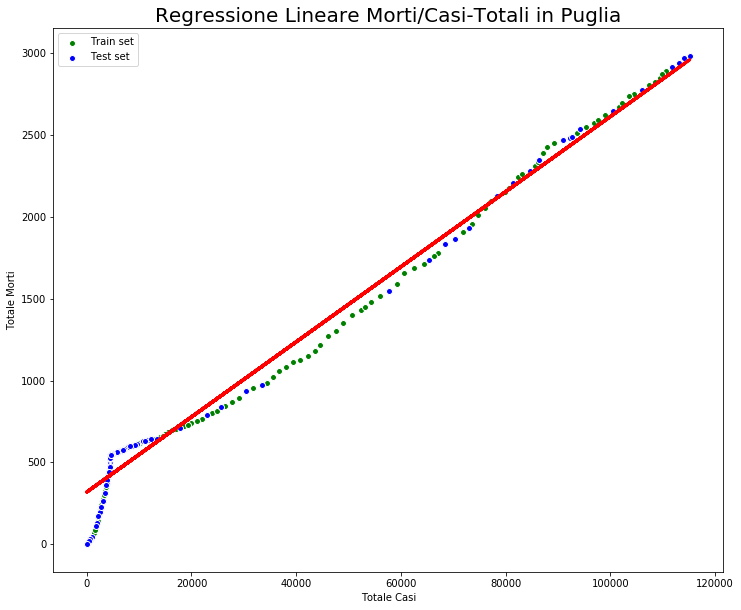

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 10))
plt.title("Regressione Lineare Morti/Casi-Totali in Puglia", size=20)



print("Peso dei casi totali: "+ str(ll.coef_[0]))
print("Bias: "+str(ll.intercept_))


plt.scatter(X_train, Y_train, c="green",  edgecolor='white', label="Train set")
plt.scatter(X_test, Y_test, c="blue",  edgecolor='white', label="Test set")

plt.xlabel('Totale Casi')
plt.ylabel('Totale Morti')

plt.legend(loc=2)

plt.plot(X_test, Y_pred, color='red', linewidth=3)